# Using the class Table() for data analysis

Say we have previously renamed the EPW files with rename_epw_files(), and the EPWs we currently have are:

- United-Kingdom_Aberdeen_Present

- United-Kingdom_London_Present

We also have transformed the IDF file TestModel_onlyGeometryForVRFsystem_2zones_CalcVent_V2220.idf, and the IDFs we currently have are:

- TestModel_onlyGeometryForVRFsystem_2zones_CalcVent_V2220[CS_INT EN16798[CA_3[CM_0[HM_2[VC_0[VO_0[MT_50[MW_50[AT_0.1[NS_X.idf

- TestModel_onlyGeometryForVRFsystem_2zones_CalcVent_V2220[CS_INT EN16798[CA_3[CM_3[HM_2[VC_0[VO_0[MT_50[MW_50[AT_0.1[NS_X.idf

Next, we simulate these files with runEp(), so the CSVs we get are:

- TestModel_onlyGeometryForVRFsystem_2zones_CalcVent_V2220[CS_INT EN16798[CA_3[CM_0[HM_2[VC_0[VO_0[MT_50[MW_50[AT_0.1[NS_X[United-Kingdom_Aberdeen_Present.csv

- TestModel_onlyGeometryForVRFsystem_2zones_CalcVent_V2220[CS_INT EN16798[CA_3[CM_0[HM_2[VC_0[VO_0[MT_50[MW_50[AT_0.1[NS_X[United-Kingdom_London_Present.csv

- TestModel_onlyGeometryForVRFsystem_2zones_CalcVent_V2220[CS_INT EN16798[CA_3[CM_3[HM_2[VC_0[VO_0[MT_50[MW_50[AT_0.1[NS_X[United-Kingdom_Aberdeen_Present.csv

- TestModel_onlyGeometryForVRFsystem_2zones_CalcVent_V2220[CS_INT EN16798[CA_3[CM_3[HM_2[VC_0[VO_0[MT_50[MW_50[AT_0.1[NS_X[United-Kingdom_London_Present.csv

So now, let's use the class Table() to analyse the data.

## - Getting the full dataset of simulation results

In [1]:
from accim.data.datawrangling import Table
dataset_hourly = Table(
    #datasets=list Since we are not specifying any list, it will use all available CSVs in the folder
    frequency='hourly',
    frequency_sum_or_mean='sum', #this makes the sum or average when aggregating in days, months or runperiod; since the original CSV frequency is in hour, it won't make any aeffect
    standard_outputs=True,
    level=['building'],
    level_sum_or_mean=['sum', 'mean'],
    #match_cities=bool Only used when EPW file has NOT been previously renamed
    #manage_epw_names=bool Only used when EPW file has NOT been previously renamed
    split_epw_names=True, #to split EPW names based on the format Country_City_RCPscenario-YEar
)

Input data frequency in file TestModel_onlyGeometryForVRFsystem_2zones_CalcVent_V2220[CS_INT EN16798[CA_3[CM_0[HM_2[VC_0[VO_0[MT_50[MW_50[AT_0.1[NS_X[United-Kingdom_Aberdeen_Present.csv is hourly, therefore no aggregation will be performed.
Input data frequency in file TestModel_onlyGeometryForVRFsystem_2zones_CalcVent_V2220[CS_INT EN16798[CA_3[CM_0[HM_2[VC_0[VO_0[MT_50[MW_50[AT_0.1[NS_X[United-Kingdom_London_Present.csv is hourly, therefore no aggregation will be performed.
Input data frequency in file TestModel_onlyGeometryForVRFsystem_2zones_CalcVent_V2220[CS_INT EN16798[CA_3[CM_3[HM_2[VC_0[VO_0[MT_50[MW_50[AT_0.1[NS_X[United-Kingdom_Aberdeen_Present.csv is hourly, therefore no aggregation will be performed.
Input data frequency in file TestModel_onlyGeometryForVRFsystem_2zones_CalcVent_V2220[CS_INT EN16798[CA_3[CM_3[HM_2[VC_0[VO_0[MT_50[MW_50[AT_0.1[NS_X[United-Kingdom_London_Present.csv is hourly, therefore no aggregation will be performed.
All CSVs are for present scenario.


A Table object has been created, which includes a number of accessible variables. The most important is the Pandas Dataframe created from the CSVs, which can be accessed with .df (in this case, dataset_hourly.df)

In [2]:
dataset_hourly.df

,Model,ComfStand,Category,ComfMod,HVACmode,VentCtrl,VSToffset,MinOToffset,MaxWindSpeed,ASTtol,...,Building_Total_Total Energy Demand (kWh/m2) (summed),Building_Total_Total Energy Demand (kWh/m2) (mean),Building_Total_Total Energy Consumption (kWh/m2) (summed),Building_Total_Total Energy Consumption (kWh/m2) (mean),Building_Total_Zone Air Volume (m3) (summed),Building_Total_Zone Floor Area (m2) (summed),Building_Total_PMV (summed),Building_Total_PMV (mean),Building_Total_PPD (%) (summed),Building_Total_PPD (%) (mean)
0,TestModel_onlyGeometryForVRFsystem_2zones_Calc...,CS_INT EN16798,CA_3,CM_0,HM_2,VC_0,VO_0,MT_50,MW_50,AT_0.1,...,0.029421,0.007355,0.022573,0.005643,232.0401,66.2971,0.0,NaN,0.0,NaN
1,TestModel_onlyGeometryForVRFsystem_2zones_Calc...,CS_INT EN16798,CA_3,CM_0,HM_2,VC_0,VO_0,MT_50,MW_50,AT_0.1,...,0.032875,0.008219,0.026173,0.006543,232.0401,66.2971,0.0,NaN,0.0,NaN
2,TestModel_onlyGeometryForVRFsystem_2zones_Calc...,CS_INT EN16798,CA_3,CM_0,HM_2,VC_0,VO_0,MT_50,MW_50,AT_0.1,...,0.035295,0.008824,0.028662,0.007166,232.0401,66.2971,0.0,NaN,0.0,NaN
3,TestModel_onlyGeometryForVRFsystem_2zones_Calc...,CS_INT EN16798,CA_3,CM_0,HM_2,VC_0,VO_0,MT_50,MW_50,AT_0.1,...,0.036866,0.009217,0.030198,0.007550,232.0401,66.2971,0.0,NaN,0.0,NaN
4,TestModel_onlyGeometryForVRFsystem_2zones_Calc...,CS_INT EN16798,CA_3,CM_0,HM_2,VC_0,VO_0,MT_50,MW_50,AT_0.1,...,0.037716,0.009429,0.030992,0.007748,232.0401,66.2971,0.0,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,TestModel_onlyGeometryForVRFsystem_2zones_Calc...,CS_INT EN16798,CA_3,CM_3,HM_2,VC_0,VO_0,MT_50,MW_50,AT_0.1,...,0.011349,0.002837,0.007941,0.001985,232.0401,66.2971,0.0,NaN,0.0,NaN
35036,TestModel_onlyGeometryForVRFsystem_2zones_Calc...,CS_INT EN16798,CA_3,CM_3,HM_2,VC_0,VO_0,MT_50,MW_50,AT_0.1,...,0.011955,0.002989,0.008373,0.002093,232.0401,66.2971,0.0,NaN,0.0,NaN
35037,TestModel_onlyGeometryForVRFsystem_2zones_Calc...,CS_INT EN16798,CA_3,CM_3,HM_2,VC_0,VO_0,MT_50,MW_50,AT_0.1,...,0.012974,0.003243,0.009094,0.002273,232.0401,66.2971,0.0,NaN,0.0,NaN
35038,TestModel_onlyGeometryForVRFsystem_2zones_Calc...,CS_INT EN16798,CA_3,CM_3,HM_2,VC_0,VO_0,MT_50,MW_50,AT_0.1,...,0.015072,0.003768,0.010571,0.002643,232.0401,66.2971,0.0,NaN,0.0,NaN


In [3]:
dataset_hourly.df.shape

(35040, 115)

Also, you can see the block list that has been extracted from the zones in the CSV columns, as well as the zones with heating or cooling energy consumption, and the occupied zones:

In [4]:
dataset_hourly.block_list

['BLOCK1']

In [5]:
dataset_hourly.hvac_zone_list

['BLOCK1:ZONE2', 'BLOCK1:ZONE1']

In [6]:
dataset_hourly.occupied_zone_list

['BLOCK1:ZONE2', 'BLOCK1:ZONE1']

In case of lots of CSVs, using the Table class would mean gathering the CSVs to make the Dataframe each time, and it might be very time-consuming. Therefore, the CSVs can be concatenated into a single CSV and store in the same folder with the argument concatenated_csv_name. Afterwards, that concatenated CSV can be read using the argument source_concatenated_csv_filepath each time a Table class object is created.

In [7]:
dataset_hourly_indirect = Table(
    #datasets=list Since we are not specifying any list, it will use all available CSVs in the folder
    frequency='hourly',
    frequency_sum_or_mean='sum', #this makes the sum or average when aggregating in days, months or runperiod; since the original CSV frequency is in hour, it won't make any aeffect
    standard_outputs=True,
    #level_sum_or_mean and level will be specified later
    #match_cities=bool Only used when EPW file has NOT been previously renamed
    #manage_epw_names=bool Only used when EPW file has NOT been previously renamed
    split_epw_names=True, #to split EPW names based on the format Country_City_RCPscenario-YEar
    concatenated_csv_name='notebook_example' #Useful when working with large datasets. It saves the output dataset to a CSV file, so you don't need to re-do some work. Afterwards, it can be imported with source_concatenated_csv_filepath argument.
)

Input data frequency in file TestModel_onlyGeometryForVRFsystem_2zones_CalcVent_V2220[CS_INT EN16798[CA_3[CM_0[HM_2[VC_0[VO_0[MT_50[MW_50[AT_0.1[NS_X[United-Kingdom_Aberdeen_Present.csv is hourly, therefore no aggregation will be performed.
Input data frequency in file TestModel_onlyGeometryForVRFsystem_2zones_CalcVent_V2220[CS_INT EN16798[CA_3[CM_0[HM_2[VC_0[VO_0[MT_50[MW_50[AT_0.1[NS_X[United-Kingdom_London_Present.csv is hourly, therefore no aggregation will be performed.
Input data frequency in file TestModel_onlyGeometryForVRFsystem_2zones_CalcVent_V2220[CS_INT EN16798[CA_3[CM_3[HM_2[VC_0[VO_0[MT_50[MW_50[AT_0.1[NS_X[United-Kingdom_Aberdeen_Present.csv is hourly, therefore no aggregation will be performed.
Input data frequency in file TestModel_onlyGeometryForVRFsystem_2zones_CalcVent_V2220[CS_INT EN16798[CA_3[CM_3[HM_2[VC_0[VO_0[MT_50[MW_50[AT_0.1[NS_X[United-Kingdom_London_Present.csv is hourly, therefore no aggregation will be performed.


We just generated a CSV, whose name begins with 'notebook example', specifies the input data and ends with 'CSVconcatenated'. If there is some row with NaN, it will be generated another CSV reporting this, but ending with 'Rows_with_NaNs'. We should be able to see it below:

In [8]:
import os
os.listdir()

['.ipynb_checkpoints',
 'notebook_example[freq-hourly[frequency_sum_or_mean-sum[standard_outputs-True[CSVconcatenated.csv',
 'TestModel_onlyGeometryForVRFsystem_2zones_CalcVent_V2220[CS_INT EN16798[CA_3[CM_0[HM_2[VC_0[VO_0[MT_50[MW_50[AT_0.1[NS_X[United-Kingdom_Aberdeen_Present.csv',
 'TestModel_onlyGeometryForVRFsystem_2zones_CalcVent_V2220[CS_INT EN16798[CA_3[CM_0[HM_2[VC_0[VO_0[MT_50[MW_50[AT_0.1[NS_X[United-Kingdom_London_Present.csv',
 'TestModel_onlyGeometryForVRFsystem_2zones_CalcVent_V2220[CS_INT EN16798[CA_3[CM_3[HM_2[VC_0[VO_0[MT_50[MW_50[AT_0.1[NS_X[United-Kingdom_Aberdeen_Present.csv',
 'TestModel_onlyGeometryForVRFsystem_2zones_CalcVent_V2220[CS_INT EN16798[CA_3[CM_3[HM_2[VC_0[VO_0[MT_50[MW_50[AT_0.1[NS_X[United-Kingdom_London_Present.csv',
 'using_Table.ipynb']

Now, let's continue working with the CSVconcatenated we have generated:

In [9]:
dataset_hourly_indirect = Table(
    # 3 arguments below have been previously specified, and in fact, are stored at the concatenated CSV filename. So you don't need to specify these again.
    # frequency='hourly',
    # frequency_sum_or_mean='sum',
    # standard_outputs=True,
    level=['building'],
    level_sum_or_mean=['sum', 'mean'],
    split_epw_names=True, #to split EPW names based on the format Country_City_RCPscenario-YEar
    source_concatenated_csv_filepath='notebook_example[freq-hourly[frequency_sum_or_mean-sum[standard_outputs-True[CSVconcatenated.csv'
)

All CSVs are for present scenario.


In [10]:
dataset_hourly_indirect.df.shape

(35040, 115)

You can see we have obtained the same full dataset.

## Filtering results

We have used any of the 2 methods to obtain the full dataset of simulation results.

At this point, we should have decided what table or graph we intend to make, and therefore we should know what data we are going to show in it. In this case, we want to make a figure with different subplots, showing the different ComfMod values on the rows and the different EPW_City_or_subcountry values on the columns, and in each subplot, a scatter plot with the indoor operative temperature and adaptive heating and cooling setpoints on the y main axis (left spine), and on the secondary y axis, 2 different spines, one of them to show the heating and cooling energy demand, and the other one the air changes.

Now, let's extract the data we are really interested in. For this, we can use the method called format_table():

In [11]:
dataset_hourly.format_table(
    type_of_table='custom', # Used to choose some predefined tables. It can be 'energy demand', 'comfort hours', 'temperature', 'all' or 'custom'
    custom_cols=[ #if type_of_table is 'custom', custom_cols is used to filter the desired columns to keep
        'Adaptive Cooling Setpoint Temperature_No Tolerance (°C)',
        'Adaptive Heating Setpoint Temperature_No Tolerance (°C)',
        'Building_Total_Zone Operative Temperature (°C) (mean)',
        'BLOCK1:ZONE2_EN16798-1 Running mean outdoor temperature (°C)',
        'Building_Total_Cooling Energy Demand (kWh/m2) (summed)',
        'Building_Total_Heating Energy Demand (kWh/m2) (summed)',
        'Building_Total_AFN Zone Infiltration Air Change Rate (ach) (summed)'
    ]
)

So, we have already filtered the columns we wanted. Let's look at the result:

In [12]:
dataset_hourly.df

,Date/Time,Model,ComfStand,Category,ComfMod,HVACmode,VentCtrl,VSToffset,MinOToffset,MaxWindSpeed,...,EPW_Scenario-Year,EPW_Scenario,EPW_Year,Adaptive Cooling Setpoint Temperature_No Tolerance (°C),Adaptive Heating Setpoint Temperature_No Tolerance (°C),Building_Total_Zone Operative Temperature (°C) (mean),BLOCK1:ZONE2_EN16798-1 Running mean outdoor temperature (°C),Building_Total_Cooling Energy Demand (kWh/m2) (summed),Building_Total_Heating Energy Demand (kWh/m2) (summed),Building_Total_AFN Zone Infiltration Air Change Rate (ach) (summed)
0,01/01 00:00,TestModel_onlyGeometryForVRFsystem_2zones_Calc...,CS_INT EN16798,CA_3,CM_0,HM_2,VC_0,VO_0,MT_50,MW_50,...,Present,Present,Present,25.0,18.0,18.073840,-1.071071,0.0,0.029421,0.198221
1,01/01 01:00,TestModel_onlyGeometryForVRFsystem_2zones_Calc...,CS_INT EN16798,CA_3,CM_0,HM_2,VC_0,VO_0,MT_50,MW_50,...,Present,Present,Present,25.0,18.0,18.058678,-1.071071,0.0,0.032875,0.210492
2,01/01 02:00,TestModel_onlyGeometryForVRFsystem_2zones_Calc...,CS_INT EN16798,CA_3,CM_0,HM_2,VC_0,VO_0,MT_50,MW_50,...,Present,Present,Present,25.0,18.0,18.060149,-1.071071,0.0,0.035295,0.219718
3,01/01 03:00,TestModel_onlyGeometryForVRFsystem_2zones_Calc...,CS_INT EN16798,CA_3,CM_0,HM_2,VC_0,VO_0,MT_50,MW_50,...,Present,Present,Present,25.0,18.0,18.067805,-1.071071,0.0,0.036866,0.223521
4,01/01 04:00,TestModel_onlyGeometryForVRFsystem_2zones_Calc...,CS_INT EN16798,CA_3,CM_0,HM_2,VC_0,VO_0,MT_50,MW_50,...,Present,Present,Present,25.0,18.0,18.077287,-1.071071,0.0,0.037716,0.224549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,31/12 19:00,TestModel_onlyGeometryForVRFsystem_2zones_Calc...,CS_INT EN16798,CA_3,CM_3,HM_2,VC_0,VO_0,MT_50,MW_50,...,Present,Present,Present,26.1,17.1,17.171267,7.543148,0.0,0.011349,0.180364
35036,31/12 20:00,TestModel_onlyGeometryForVRFsystem_2zones_Calc...,CS_INT EN16798,CA_3,CM_3,HM_2,VC_0,VO_0,MT_50,MW_50,...,Present,Present,Present,26.1,17.1,17.176058,7.543148,0.0,0.011955,0.175023
35037,31/12 21:00,TestModel_onlyGeometryForVRFsystem_2zones_Calc...,CS_INT EN16798,CA_3,CM_3,HM_2,VC_0,VO_0,MT_50,MW_50,...,Present,Present,Present,26.1,17.1,17.178160,7.543148,0.0,0.012974,0.191868
35038,31/12 22:00,TestModel_onlyGeometryForVRFsystem_2zones_Calc...,CS_INT EN16798,CA_3,CM_3,HM_2,VC_0,VO_0,MT_50,MW_50,...,Present,Present,Present,26.1,17.1,17.176237,7.543148,0.0,0.015072,0.255266


As you can see, the number of columns have been reduced to 29, which are 22 columns for the index and categorical data, and the 7 columns we filtered.

## - Making graphs

We will make the figure with scatter_plot(), however it needs some input data we will previously generate with generate_fig_data().

### Scatter plot:

As said above, we first need to generate the dataset lists with generate_fig_data():

In [13]:
dataset_hourly.generate_fig_data(
    vars_to_gather_rows=['ComfMod'], # variables to gather in rows of subplots
    vars_to_gather_cols=['EPW_City_or_subcountry'],# variables to gather in columns of subplots
    data_on_x_axis='BLOCK1:ZONE2_EN16798-1 Running mean outdoor temperature (°C)', #column name (string) for the data on x axis
    data_on_y_main_axis=[ #list which includes the name of the axis on the first place, and then in the second place, a list which includes the column names you want to plot
        [
            'Indoor Operative Temperature (°C)',
            [
                'Adaptive Cooling Setpoint Temperature_No Tolerance (°C)',
                'Adaptive Heating Setpoint Temperature_No Tolerance (°C)',
                'Building_Total_Zone Operative Temperature (°C) (mean)',
            ]
        ],
    ],
    data_on_y_sec_axis=[ # similarly to above, a list including the name of the secondary y-axis and the column names you want to plot in it
        [
            'Energy (kWh/m2)',
            [
                'Building_Total_Cooling Energy Demand (kWh/m2) (summed)',
                'Building_Total_Heating Energy Demand (kWh/m2) (summed)',
            ]
        ],
        [
            'Air renovation (ach)',
            [
                'Building_Total_AFN Zone Infiltration Air Change Rate (ach) (summed)'
            ]
        ]
    ],
    colorlist_y_main_axis=[
        [
            'Indoor Operative Temperature (°C)',
            [
                'b',
                'r',
                'g',
            ]
        ],
    ],
    colorlist_y_sec_axis=[
        [
            'Energy (kWh/m2)',
            [
                'cyan',
                'orange',
            ]
        ],
        [
            'Air renovation (ach)',
            [
                'yellow'
            ]
        ]
    ]
)

And finally we can plot the figure:

The number of rows and the list of these is going to be:
No. of rows = 2
List of rows:
CM_0
CM_3
The number of columns and the list of these is going to be:
No. of columns = 2
List of columns:
Aberdeen
London


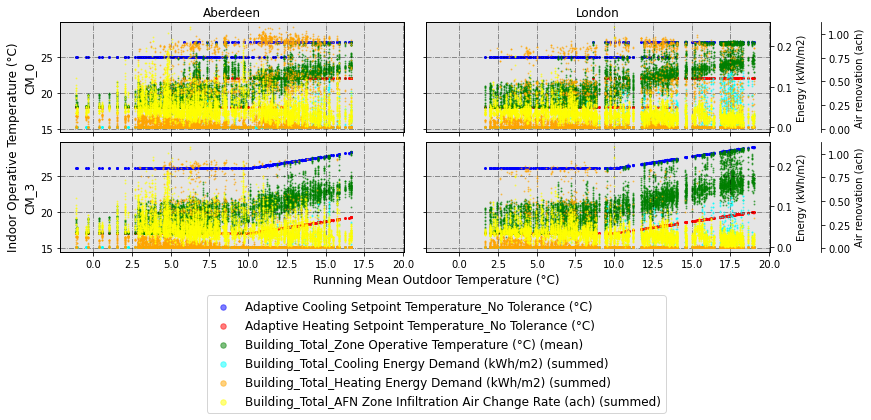

In [14]:
dataset_hourly.scatter_plot(
    supxlabel='Running Mean Outdoor Temperature (°C)', # data label on x axis
    figname=f'WIP_scatterplot_RMOT',
    figsize=6,
    ratio_height_to_width=0.33,
    confirm_graph=True
)


### Adaptive vs Static data scatter plot:

A very specific type of scatter plot can be done to show the relationship between data related to adaptive and static setpoint temperatures. In this case, you would need to use the following arguments in generate_fig_data: adap_vs_stat_data_y_main, baseline and colorlist_adap_vs_stat_data; finally, you would need to use the scatter_plot_adap_vs_stat() function.

The number of rows and the list of these is going to be:
No. of rows = 2
List of self.rows:
Aberdeen
London
The number of columns and the list of these is going to be:
No. of columns = 1
List of columns:
CM_3


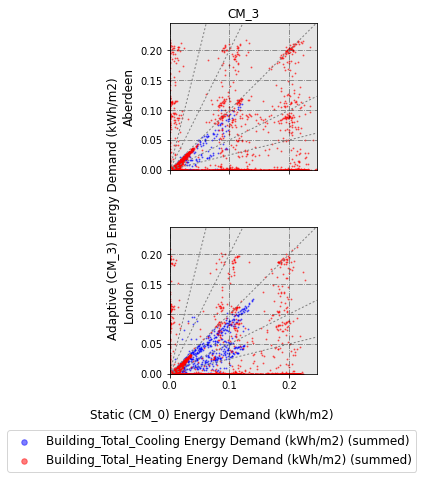

In [15]:
dataset_hourly.generate_fig_data(
    vars_to_gather_rows=['EPW_City_or_subcountry'], #you can enter multiple variables, for example: ['EPW_City_or_subcountry', 'EPW_Scenario-Year']
    vars_to_gather_cols=['ComfMod'], #you can enter multiple variables, for example: ['ComfStand', 'ComfMod']
    adap_vs_stat_data_y_main=[ # in this case, you only need to specify a list which includes the data columns you want to plot
        'Building_Total_Cooling Energy Demand (kWh/m2) (summed)',
        'Building_Total_Heating Energy Demand (kWh/m2) (summed)',
    ],
    baseline='CM_0', # the baseline needs to be in vars_to_gather_cols, and it's going to be shown on x axis. Given the variables we have simulated, you can choose between 'CM_0' and 'CM_3'. If multiple variables were specified in vars_to_gather_cols, the names should be joined with '[', for example: 'CS_INT EN1798[CM_0'
    colorlist_adap_vs_stat_data=[
        'b',
        'r',
    ]
)

dataset_hourly.scatter_plot_adap_vs_stat(
    supxlabel='Static (CM_0) Energy Demand (kWh/m2)',
    supylabel='Adaptive (CM_3) Energy Demand (kWh/m2)',
    figname='WIP_scatterplot_adap_vs_stat',
    figsize=3,
    confirm_graph=True
)